In [2]:
import psycopg2
import pandas as pd

from sqlalchemy import create_engine, text as sql_text

In [460]:
# Connection details
host_p='localhost'
database_p='db_trans'
user_p='postgres'
password_p='milo12'
port_p = 5432

# #establishing the connection
conn = psycopg2.connect(database=database_p, user=user_p, password=password_p, host=host_p, port=port_p)
#Creating a cursor object using the cursor() method
conn.autocommit = True
cursor = conn.cursor()

connection_string = f'postgresql://{user_p}:{password_p}@{host_p}:{port_p}/{database_p}'
engine_postgresql = create_engine(connection_string)

In [461]:
q='''
SELECT *
FROM user_trans
'''

df_sql = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df_sql


,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT - 4053546497837,2023-07-10,558473,IDR,03:52:52,170252575,Paypal
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA - 0740711829874,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV - 5752528211822,2023-07-01,837123,IDR,21:51:19,5679424956,OVO
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL - 0747912082264,2023-03-03,501203,IDR,05:14:52,3904218065,Dana
4,651413,Bank Transfers,18689638.0,D,GOPAY GP - 3828714937033,2023-10-03,535927,IDR,13:08:53,5623836935,Paypal
...,...,...,...,...,...,...,...,...,...,...,...
299995,985437,QR Code Payment,-5529607.0,D,DEPOSIT CROSS BORDER DP - 1923585075709,2023-09-14,98687,IDR,05:28:31,7917104989,Paypal
299996,798540,Checks and Cheques,9121206.0,C,TRANSFER BANK TA - 5154589180367,2023-01-18,388616,IDR,18:32:29,4857720942,Paypal
299997,793555,Gift Cards,-5442311.0,D,INTERNATIONAL TRANSACTION IT - 5324271420396,2023-11-06,979353,IDR,04:45:35,3204729335,Bank Services
299998,219700,Cryptocurrencies,173327.0,C,DEPOSIT CROSS BORDER DP - 5268174687246,2023-09-28,294801,IDR,14:22:28,2872010914,Paypal


In [44]:
df_sql.to_csv('transaction.csv', index=False)

In [3]:
dtrans = pd.read_csv('transaction.csv')
dtrans.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT - 4053546497837,2023-07-10,558473,IDR,03:52:52,170252575,Paypal
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA - 0740711829874,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV - 5752528211822,2023-07-01,837123,IDR,21:51:19,5679424956,OVO
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL - 0747912082264,2023-03-03,501203,IDR,05:14:52,3904218065,Dana
4,651413,Bank Transfers,18689638.0,D,GOPAY GP - 3828714937033,2023-10-03,535927,IDR,13:08:53,5623836935,Paypal


# Data Cleaning
#### Karena data sudah bersih secara huruf kapital dan format tanggal. Maka data cleaning yang akan dilakukan adalah melihat duplicated data dan ektsraksi fitur information tanpa kode 

In [4]:
dc = dtrans.copy()

In [5]:
dc.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT - 4053546497837,2023-07-10,558473,IDR,03:52:52,170252575,Paypal
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA - 0740711829874,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV - 5752528211822,2023-07-01,837123,IDR,21:51:19,5679424956,OVO
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL - 0747912082264,2023-03-03,501203,IDR,05:14:52,3904218065,Dana
4,651413,Bank Transfers,18689638.0,D,GOPAY GP - 3828714937033,2023-10-03,535927,IDR,13:08:53,5623836935,Paypal


### Menghilangkan angka pada kolom information

In [6]:
dc['information'] = dc['information'].str[:-13]
dc.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT -,2023-07-10,558473,IDR,03:52:52,170252575,Paypal
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA -,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV -,2023-07-01,837123,IDR,21:51:19,5679424956,OVO
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL -,2023-03-03,501203,IDR,05:14:52,3904218065,Dana
4,651413,Bank Transfers,18689638.0,D,GOPAY GP -,2023-10-03,535927,IDR,13:08:53,5623836935,Paypal


### Menghilangkan simbol '-' pada kolom information

In [7]:
dc['information'] = dc['information'].str.replace(r'\s*-\s*', '', regex=True)

In [90]:
dc.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Paypal


In [8]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account_number    300000 non-null  int64  
 1   trx_type          300000 non-null  object 
 2   amount            300000 non-null  float64
 3   flag_db_cr        300000 non-null  object 
 4   information       300000 non-null  object 
 5   trx_date          300000 non-null  object 
 6   reference_number  300000 non-null  int64  
 7   currency          300000 non-null  object 
 8   trx_time          300000 non-null  object 
 9   cif               300000 non-null  int64  
 10  fitur             300000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 25.2+ MB


### Duplicated Values

In [9]:
dc.duplicated().sum()

0

### Membuat setiap informasi GOPAY memiliki fitur Gopay

In [10]:
dc['fitur'] = dc.apply(lambda row: 'Gopay' if 'GOPAY' in row['information'] else row['fitur'], axis=1)

In [11]:
dc.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Gopay


# Membuat kolom kategori

In [12]:
dc_cat = dc.copy()

In [13]:
dc_cat['fitur'].value_counts()

Gopay            67734
Shopee Pay       46694
Paypal           46635
Dana             46467
Bank Services    46292
OVO              46178
Name: fitur, dtype: int64

In [14]:
dc_cat['information'].value_counts()

TRANSFER BANK TA                21711
WITHDRAWAL TRANSFER WT          21634
ONLINE SHOPPING OL              21526
REVERSAL RV                     21508
BIAYA ADMIN BA                  21483
DEPOSIT CROSS BORDER DP         21425
INTERNATIONAL TRANSACTION IT    21411
GOPAY GP                        21402
PURCHASE PR                     21378
UTILITY PAYMENT UI              21370
PAYMENT TELCO PASCABAYAR PY     21361
PAYMENT CC PY                   21339
DEPOSIT TRANSFER(ATM) DP        21283
WITHDRAWAL TRANSFER(ATM) WT     21169
Name: information, dtype: int64

In [15]:
dc_cat['trx_type'].value_counts()

Cryptocurrencies        27654
Debit Cards             27471
Bank Transfers          27344
Gift Cards              27315
Ewallet                 27282
Credit Cards            27275
Electronic Transfers    27224
Checks and Cheques      27183
Mobile Banking          27157
QR Code Payment         27072
Cash                    27023
Name: trx_type, dtype: int64

In [16]:
dc_cat['category'] = dc_cat.apply(lambda row:
                                  'EWALLET' if row['fitur'] in ['Gopay', 'Shopee Pay', 'Dana', 'OVO', 'QR Code Payment'] or
                                  row['information'] == 'ONLINE SHOPPING OL' else
                                  
                                  'WITHDRAWAL' if row['information'] in ['WITHDRAWAL TRANSFER WT', 'WITHDRAWAL TRANSFER(ATM) WT'] else
                                  
                                  'BANK SERVICES' if row['fitur'] == 'Bank Services' or
                                  row['trx_type'] in ['Bank Transfers', 'Mobile Banking', 'Checks and Cheques', 'Debit Cards', 'Credit Cards'] or
                                  row['information'] in ['TRANSFER BANK TA', 'Payment CC PY', 'Biaya Admin BA'] else
                                  
                                  'UTILITY PAYMENT' if row['information'] in ['UTILITY PAYMENT UI', 'PAYMENT TELCO PASCABAYAR PY'] else
                                  
                                  'DEPOSIT' if row['information'] == 'DEPOSIT TRANSFER(ATM) DP' else
                                  
                                  'INTERNATIONAL TRANSACTION' if row['information'] in ['INTERNATIONAL TRANSACTION IT', 'DEPOSIT CROSS BORDER DP'] or
                                  row['fitur'] == 'Paypal' else
                                  
                                  'OTHER' if (row['trx_type'] == 'Cryptocurrencies' or row['trx_type'] == 'Gift Cards') and row['information'] == 'PURCHASE PR' else
                                  'OTHER', axis=1)



In [17]:
dc_cat.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,category
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal,BANK SERVICES
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay,EWALLET
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO,EWALLET
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana,EWALLET
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Gopay,EWALLET


In [18]:
dc_cat['category'].value_counts()

EWALLET                      214245
BANK SERVICES                 53950
WITHDRAWAL                    14230
INTERNATIONAL TRANSACTION     11791
UTILITY PAYMENT                3862
DEPOSIT                        1922
Name: category, dtype: int64

In [19]:
dc_cat['category'] = dc_cat.apply(lambda row: 'REVERSAL' if 'REVERSAL' in row['information'] else row['category'], axis=1)



In [20]:
dc_cat.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,category
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal,BANK SERVICES
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay,EWALLET
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO,REVERSAL
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana,EWALLET
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Gopay,EWALLET


In [21]:
dc_cat['category'].value_counts()

EWALLET                      199893
BANK SERVICES                 48737
REVERSAL                      21508
WITHDRAWAL                    14230
INTERNATIONAL TRANSACTION      9848
UTILITY PAYMENT                3862
DEPOSIT                        1922
Name: category, dtype: int64

In [22]:
print(dc_cat[dc_cat['category'] == 'OTHER'][['fitur', 'information']])


Empty DataFrame
Columns: [fitur, information]
Index: []


In [23]:
dc_cat['category'] = dc_cat.apply(lambda row: 'OTHER' if (row['trx_type'] in ['Cryptocurrencies', 'Gift Cards']) and row['information'] == 'PURCHASE PR' else row['category'], axis=1)


In [24]:
dc_cat.head()

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,category
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal,BANK SERVICES
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay,EWALLET
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO,REVERSAL
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana,EWALLET
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Gopay,EWALLET


In [25]:
dc_cat['category'].value_counts()

EWALLET                      197285
BANK SERVICES                 48079
REVERSAL                      21508
WITHDRAWAL                    14230
INTERNATIONAL TRANSACTION      9188
OTHER                          3926
UTILITY PAYMENT                3862
DEPOSIT                        1922
Name: category, dtype: int64

# Machine Learning 

In [241]:
dc_tf = dc_cat.copy()

### Vectorizer : TF-IDF

In [254]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# menggabungkan kolom teks menjadi satu kolom
dc_tf['text_features'] = dc_tf['trx_type'] + dc_tf['flag_db_cr'] + dc_tf['information'] + dc_tf['fitur']

# Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# target
y = dc_tf['category']

# Split data menjadi data train (60%), data validasi (20%), dan data test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(dc_tf['text_features'], y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ekstraksi fitur teks menggunakan TF-IDF pada data train
X_train_idf = tfidf_vectorizer.fit_transform(X_train)

# Ekstraksi fitur teks menggunakan TF-IDF pada data test
X_test_idf = tfidf_vectorizer.fit_transform(X_test)


# Ekstraksi fitur teks menggunakan TF-IDF pada data validasi
X_val_idf = tfidf_vectorizer.fit_transform(X_val)


## Naive Bayes

In [250]:
from sklearn.naive_bayes import MultinomialNB

In [255]:
model_nb = MultinomialNB()
model_nb.fit(X_train_idf, y_train)

MultinomialNB()

In [256]:
class_train = (classification_report(y_train, model_nb.predict(X_train_idf)))
print(f"\nClassification in train set:\n{class_train}")
predictions = model_nb.predict(X_test_idf)
class_test = classification_report(y_test, predictions)
print(f"\nClassification in test set:\n{class_test}\n")


Classification in train set:
                           precision    recall  f1-score   support

            BANK SERVICES       0.98      1.00      0.99     28761
                  DEPOSIT       1.00      1.00      1.00      1150
                  EWALLET       1.00      1.00      1.00    118451
INTERNATIONAL TRANSACTION       1.00      0.88      0.93      5483
                    OTHER       1.00      1.00      1.00      2376
                 REVERSAL       1.00      1.00      1.00     12939
          UTILITY PAYMENT       1.00      1.00      1.00      2298
               WITHDRAWAL       1.00      1.00      1.00      8542

                 accuracy                           1.00    180000
                macro avg       1.00      0.98      0.99    180000
             weighted avg       1.00      1.00      1.00    180000


Classification in test set:
                           precision    recall  f1-score   support

            BANK SERVICES       0.98      1.00      0.99      9778

### Data Validasi

In [258]:
predictions = model_nb.predict(X_val_idf)
class_val = (classification_report(y_val, model_nb.predict(X_val_idf)))
print(f"\nClassification in validation set:\n{class_train}")



Classification in validation set:
                           precision    recall  f1-score   support

            BANK SERVICES       0.98      1.00      0.99     28761
                  DEPOSIT       1.00      1.00      1.00      1150
                  EWALLET       1.00      1.00      1.00    118451
INTERNATIONAL TRANSACTION       1.00      0.88      0.93      5483
                    OTHER       1.00      1.00      1.00      2376
                 REVERSAL       1.00      1.00      1.00     12939
          UTILITY PAYMENT       1.00      1.00      1.00      2298
               WITHDRAWAL       1.00      1.00      1.00      8542

                 accuracy                           1.00    180000
                macro avg       1.00      0.98      0.99    180000
             weighted avg       1.00      1.00      1.00    180000



## KNN

In [260]:
from sklearn.neighbors import KNeighborsClassifier

In [261]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_idf, y_train)

KNeighborsClassifier()

In [264]:
class_train = (classification_report(y_train, model_knn.predict(X_train_idf)))
print(f"\nClassification in train set:\n{class_train}")
predictions = model_knn.predict(X_test_idf)
class_test = classification_report(y_test, predictions)
print(f"\nClassification in test set:\n{class_test}\n")


Classification in train set:
                           precision    recall  f1-score   support

            BANK SERVICES       1.00      1.00      1.00     28761
                  DEPOSIT       1.00      1.00      1.00      1150
                  EWALLET       1.00      1.00      1.00    118451
INTERNATIONAL TRANSACTION       1.00      1.00      1.00      5483
                    OTHER       1.00      1.00      1.00      2376
                 REVERSAL       1.00      1.00      1.00     12939
          UTILITY PAYMENT       1.00      1.00      1.00      2298
               WITHDRAWAL       1.00      1.00      1.00      8542

                 accuracy                           1.00    180000
                macro avg       1.00      1.00      1.00    180000
             weighted avg       1.00      1.00      1.00    180000


Classification in test set:
                           precision    recall  f1-score   support

            BANK SERVICES       1.00      1.00      1.00      9778

In [265]:
predictions = model_knn.predict(X_val_idf)
class_val = (classification_report(y_val, model_knn.predict(X_val_idf)))
print(f"\nClassification in validation set:\n{class_train}")


Classification in validation set:
                           precision    recall  f1-score   support

            BANK SERVICES       1.00      1.00      1.00     28761
                  DEPOSIT       1.00      1.00      1.00      1150
                  EWALLET       1.00      1.00      1.00    118451
INTERNATIONAL TRANSACTION       1.00      1.00      1.00      5483
                    OTHER       1.00      1.00      1.00      2376
                 REVERSAL       1.00      1.00      1.00     12939
          UTILITY PAYMENT       1.00      1.00      1.00      2298
               WITHDRAWAL       1.00      1.00      1.00      8542

                 accuracy                           1.00    180000
                macro avg       1.00      1.00      1.00    180000
             weighted avg       1.00      1.00      1.00    180000



# Segmentasi Reversal

In [266]:
dcsever = dc_cat.copy()

In [268]:
dcsever.head(5)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,category
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal,BANK SERVICES
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay,EWALLET
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO,REVERSAL
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana,EWALLET
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Gopay,EWALLET


In [269]:
reversal_data = dcsever[dcsever['category'] == 'REVERSAL']

In [270]:
reversal_data

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,category
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO,REVERSAL
34,836187,QR Code Payment,5485018.0,C,REVERSAL RV,2023-04-21,892227,IDR,22:54:30,299329192,Shopee Pay,REVERSAL
47,606245,Mobile Banking,7171719.0,C,REVERSAL RV,2023-09-13,8296,IDR,17:26:53,1085670331,Shopee Pay,REVERSAL
120,311271,Mobile Banking,4901155.0,D,REVERSAL RV,2023-05-09,169975,IDR,01:46:16,4852079835,OVO,REVERSAL
145,706738,Electronic Transfers,19900818.0,D,REVERSAL RV,2023-09-10,909927,IDR,11:02:48,2382107887,Bank Services,REVERSAL
...,...,...,...,...,...,...,...,...,...,...,...,...
299912,173112,Ewallet,-2484272.0,D,REVERSAL RV,2023-08-26,428258,IDR,10:01:49,634610952,Paypal,REVERSAL
299943,432206,Checks and Cheques,14842081.0,C,REVERSAL RV,2023-11-13,415219,IDR,06:26:33,8051755384,Dana,REVERSAL
299960,624626,QR Code Payment,-10187098.0,C,REVERSAL RV,2023-07-25,591323,IDR,22:09:44,2888751400,OVO,REVERSAL
299973,569329,Ewallet,11808423.0,D,REVERSAL RV,2023-04-23,989795,IDR,13:02:07,1250218923,Gopay,REVERSAL


## RFM 

### Recency (R)

In [272]:
import pandas as pd

In [273]:

# konversi trx_date menjadi datetime
reversal_data['trx_date'] = pd.to_datetime(reversal_data['trx_date'])

C:\Users\Delll\AppData\Local\Temp\ipykernel_15124\1764483563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reversal_data['trx_date'] = pd.to_datetime(reversal_data['trx_date'])


In [274]:
reversal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21508 entries, 2 to 299985
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account_number    21508 non-null  int64         
 1   trx_type          21508 non-null  object        
 2   amount            21508 non-null  float64       
 3   flag_db_cr        21508 non-null  object        
 4   information       21508 non-null  object        
 5   trx_date          21508 non-null  datetime64[ns]
 6   reference_number  21508 non-null  int64         
 7   currency          21508 non-null  object        
 8   trx_time          21508 non-null  object        
 9   cif               21508 non-null  int64         
 10  fitur             21508 non-null  object        
 11  category          21508 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [277]:
# menentukan tanggal analisis
analisis_date = pd.to_datetime('2024-01-15')

# hitung Recency
rec_rev = reversal_data.groupby('account_number')['trx_date'].max().reset_index()
rec_rev['Recency'] = (analisis_date - rec_rev['trx_date']).dt.days

In [278]:
rec_rev['Recency']

0        138
1        196
2        235
3        346
4        339
        ... 
21286     99
21287     72
21288    137
21289    339
21290    223
Name: Recency, Length: 21291, dtype: int64

### Frequency(F)

In [281]:

# Hitung Frequency
freq_rev = reversal_data.groupby('account_number').size().reset_index(name='Frequency')




In [284]:
freq_rev

,account_number,Frequency
0,24,1
1,42,1
2,111,1
3,123,1
4,125,1
...,...,...
21286,999696,1
21287,999730,1
21288,999744,1
21289,999827,1


### Monetary (M)

In [282]:
# Hitung Monetary
mon_rev = reversal_data.groupby('account_number')['amount'].sum().reset_index()
mon_rev.columns = ['account_number', 'Monetary']


In [283]:
mon_rev

,account_number,Monetary
0,24,16004550.0
1,42,3038687.0
2,111,7910904.0
3,123,1779324.0
4,125,2645999.0
...,...,...
21286,999696,19999932.0
21287,999730,3174831.0
21288,999744,-6753725.0
21289,999827,4292662.0


In [305]:
# Menggabungkan data RFM
# Gabungkan data berdasarkan 'account_number' dengan inner join
rfm_rev = pd.merge(rec_rev[['account_number', 'Recency']], freq_rev, on='account_number')
rfm_rev = pd.merge(rfm_rev, mon_rev, on='account_number')


In [306]:
rfm_rev

,account_number,Recency,Frequency,Monetary
0,24,138,1,16004550.0
1,42,196,1,3038687.0
2,111,235,1,7910904.0
3,123,346,1,1779324.0
4,125,339,1,2645999.0
...,...,...,...,...
21286,999696,99,1,19999932.0
21287,999730,72,1,3174831.0
21288,999744,137,1,-6753725.0
21289,999827,339,1,4292662.0


In [307]:
# Standarisasi Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_rev_sc = scaler.fit_transform(rfm_rev)


In [329]:
rfm_rev_sc

array([[-1.73020477, -0.41540677, -0.10008608,  1.04861659],
       [-1.73014246,  0.13471525, -0.10008608, -0.19303316],
       [-1.72990361,  0.50462489, -0.10008608,  0.27354489],
       ...,
       [ 1.73045292, -0.42489164, -0.10008608, -1.13078376],
       [ 1.73074023,  1.49105059, -0.10008608, -0.07294877],
       [ 1.73077139,  0.39080654, -0.10008608, -1.66529501]])

### KMeans Clustering

In [293]:
import numpy as np

In [331]:
from sklearn.decomposition import PCA

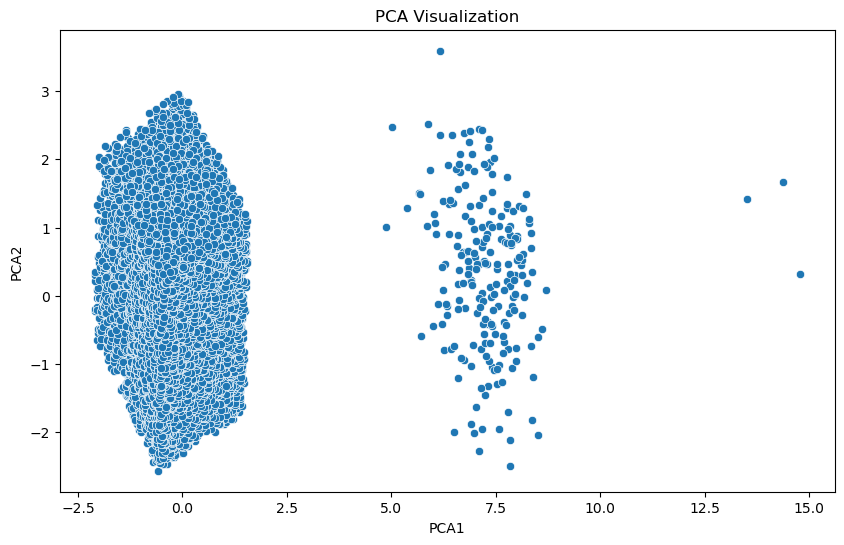

In [332]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_rev_sc)
pca_rev = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_rev)
plt.title('PCA Visualization')
plt.show()

In [301]:
# Periksa tipe data rfm_rev_sc
print(type(rfm_rev_sc))


<class 'numpy.ndarray'>


In [310]:
# karena rfm_rev_sc merupakan numpy maka konversi kedalam dataframe
rfm_sc_df = pd.DataFrame(rfm_rev_sc)

In [313]:
print(rfm_sc_df.columns)

RangeIndex(start=0, stop=4, step=1)


In [314]:
rfm_sc_df

,0,1,2,3
0,-1.730205,-0.415407,-0.100086,1.048617
1,-1.730142,0.134715,-0.100086,-0.193033
2,-1.729904,0.504625,-0.100086,0.273545
3,-1.729862,1.557445,-0.100086,-0.313634
4,-1.729855,1.491051,-0.100086,-0.230638
...,...,...,...,...
21286,1.730287,-0.785316,-0.100086,1.431226
21287,1.730404,-1.041408,-0.100086,-0.179996
21288,1.730453,-0.424892,-0.100086,-1.130784
21289,1.730740,1.491051,-0.100086,-0.072949


In [316]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\Delll\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Delll\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Delll\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Delll\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Delll\anaconda3\lib\site-packages\sklearn\clust

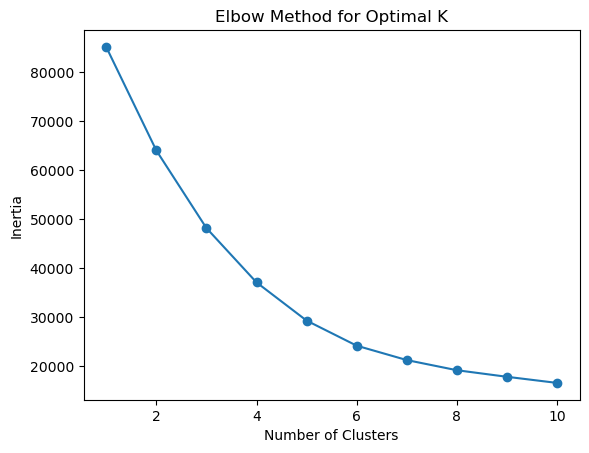

In [318]:
# Menentukan jumlah klaster menggunakan Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_sc_df)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [319]:
jumlah_klaster = 4

kmeans = KMeans(n_clusters=jumlah_klaster, random_state=42)
rfm_rev['cluster'] = kmeans.fit_predict(rfm_sc_df)

C:\Users\Delll\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


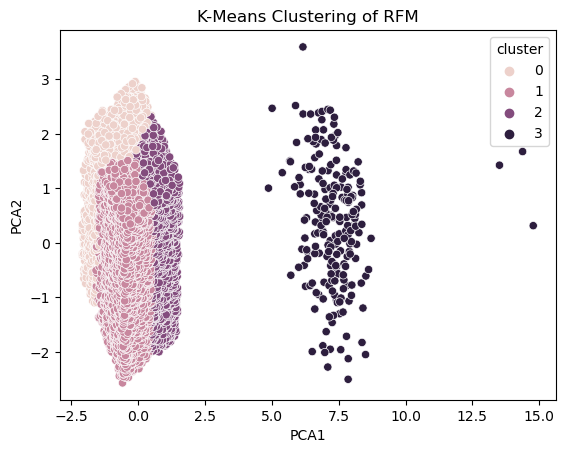

In [335]:
# Visualisasikan hasil klastering
import seaborn as sns



# Pastikan rfm_rev adalah DataFrame dengan kolom 'Recency', 'Frequency', dan 'cluster'
# Jika Anda menggunakan rfm_sc_df, gantilah dengan rfm_sc_df di bawah ini
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pd.concat([pca_rev, rfm_rev['cluster']], axis=1))
plt.title('K-Means Clustering of RFM')
plt.show()


In [336]:
# Analisis hasil klastering
cluster_analysis = rfm_rev.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print(cluster_analysis)


   cluster     Recency  Frequency      Monetary
0        0  186.505890   1.000000 -1.108877e+07
1        1  274.935308   1.000000  9.651192e+06
2        2   87.850133   1.000000  9.324493e+06
3        3  118.626168   2.014019  9.178354e+06


# Akumulasi Category Transaksi dalam Mingguan/Bulanan/Tahunan

In [76]:
akumulasi_data = dc_cat.copy()

In [77]:
akumulasi_data.head()

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,category
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal,BANK SERVICES
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay,EWALLET
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO,REVERSAL
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana,EWALLET
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Gopay,EWALLET


In [58]:
akumulasi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account_number    300000 non-null  int64  
 1   trx_type          300000 non-null  object 
 2   amount            300000 non-null  float64
 3   flag_db_cr        300000 non-null  object 
 4   information       300000 non-null  object 
 5   trx_date          300000 non-null  object 
 6   reference_number  300000 non-null  int64  
 7   currency          300000 non-null  object 
 8   trx_time          300000 non-null  object 
 9   cif               300000 non-null  int64  
 10  fitur             300000 non-null  object 
 11  category          300000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## Akumulasi Mingguan

In [78]:
# konversi trx_date menjadi datetime
akumulasi_data['trx_date'] = pd.to_datetime(akumulasi_data['trx_date'])

In [79]:
akumulasi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account_number    300000 non-null  int64         
 1   trx_type          300000 non-null  object        
 2   amount            300000 non-null  float64       
 3   flag_db_cr        300000 non-null  object        
 4   information       300000 non-null  object        
 5   trx_date          300000 non-null  datetime64[ns]
 6   reference_number  300000 non-null  int64         
 7   currency          300000 non-null  object        
 8   trx_time          300000 non-null  object        
 9   cif               300000 non-null  int64         
 10  fitur             300000 non-null  object        
 11  category          300000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 27.5+ MB


In [80]:
akumulasi_data['month'] = akumulasi_data['trx_date'].dt.month

In [81]:
akumulasi_data['year'] = akumulasi_data['trx_date'].dt.year

In [82]:
akumulasi_data['week'] =akumulasi_data['trx_date'].dt.isocalendar().week

In [83]:
akumulasi_data.head()

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,category,month,year,week
0,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,2023-07-10,558473,IDR,03:52:52,170252575,Paypal,BANK SERVICES,7,2023,28
1,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,2023-05-04,165171,IDR,13:37:54,7720000858,Gopay,EWALLET,5,2023,18
2,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,2023-07-01,837123,IDR,21:51:19,5679424956,OVO,REVERSAL,7,2023,26
3,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,2023-03-03,501203,IDR,05:14:52,3904218065,Dana,EWALLET,3,2023,9
4,651413,Bank Transfers,18689638.0,D,GOPAY GP,2023-10-03,535927,IDR,13:08:53,5623836935,Gopay,EWALLET,10,2023,40


In [383]:
analisis_date = pd.to_datetime('2023-12-20')

In [84]:
akumulasi_data.set_index('trx_date', inplace=True)

# Resample data ke frekuensi mingguan dan hitung total akumulasi per kategori
weekly_accumulation = akumulasi_data.resample('W').sum()

pivot_table = pd.pivot_table(dc_acc, values='amount', index=['week', 'year'], columns='category', aggfunc='count')

# Tampilkan hasil
pivot_table

C:\Users\Delll\AppData\Local\Temp\ipykernel_11836\2697985055.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_accumulation = akumulasi_data.resample('W').sum()


category   BANK SERVICES  DEPOSIT  EWALLET  INTERNATIONAL TRANSACTION  OTHER  \
week year                                                                      
1    2024            906       39     3882                        193     62   
2    2023            134        8      556                         36     18   
     2024            935       45     3730                        157     64   
3    2023            904       43     3673                        171     87   
4    2023            946       33     3757                        191     83   
5    2023            877       38     3828                        163     69   
6    2023            913       43     3780                        177     78   
7    2023            907       41     3812                        160     69   
8    2023            960       42     3773                        172     96   
9    2023            942       36     3934                        168     76   
10   2023            904       43     3812                        171     63   
11   2023            907       30     3694                        182     65   
12   2023            931       31     3735                        177     74   
13   2023            843       37     3821                        179     75   
14   2023            925       44     3743                        198     83   
15   2023            976       38     3689                        171     79   
16   2023            919       37     3832                        169     75   
17   2023            947       45     3733                        174     62   
18   2023            949       33     3818                        159     97   
19   2023            918       27     3772                        177     74   
20   2023            892       47     3857                        193     71   
21   2023            972       27     3785                        197     73   
22   2023            872       23     3797                        193     83   
23   2023            937       38     3900                        202     74   
24   2023            930       38     3904                        162     86   
25   2023            904       38     3836                        148     74   
26   2023            930       34     3746                        184     74   
27   2023            897       40     3753                        177     62   
28   2023            894       39     3772                        198     80   
29   2023            934       40     3779                        175     74   
30   2023            919       33     3844                        183     68   
31   2023            977       27     3787                        178     77   
32   2023            938       44     3662                        181     73   
33   2023            936       35     3886                        166     77   
34   2023            920       25     3801                        150     90   
35   2023            904       38     3815                        157     70   
36   2023            939       36     3767                        183     78   
37   2023            918       51     3809                        161     75   
38   2023            907       30     3758                        142     78   
39   2023            959       46     3799                        175     69   
40   2023            918       39     3736                        188     67   
41   2023            937       40     3829                        193     90   
42   2023            885       36     3780                        187     79   
43   2023            923       35     3824                        185     58   
44   2023            954       32     3790                        169     80   
45   2023            928       36     3728                        177     82   
46   2023            909       34     3711                        197     70   
47   2023            912       31     3740                        165     62   


## Akumulasi Bulanan

In [85]:
akumulasi_data.head()

,account_number,trx_type,amount,flag_db_cr,information,reference_number,currency,trx_time,cif,fitur,category,month,year,week
trx_date,,,,,,,,,,,,,,
2023-07-10,580659,Checks and Cheques,8145978.0,D,INTERNATIONAL TRANSACTION IT,558473,IDR,03:52:52,170252575,Paypal,BANK SERVICES,7,2023,28
2023-05-04,17731,Electronic Transfers,15008763.0,D,BIAYA ADMIN BA,165171,IDR,13:37:54,7720000858,Gopay,EWALLET,5,2023,18
2023-07-01,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,837123,IDR,21:51:19,5679424956,OVO,REVERSAL,7,2023,26
2023-03-03,623703,Debit Cards,8112922.0,C,ONLINE SHOPPING OL,501203,IDR,05:14:52,3904218065,Dana,EWALLET,3,2023,9
2023-10-03,651413,Bank Transfers,18689638.0,D,GOPAY GP,535927,IDR,13:08:53,5623836935,Gopay,EWALLET,10,2023,40


In [67]:

# Resample data ke frekuensi bulanan dan hitung total akumulasi per kategori
monthly_accumulation = akumulasi_data.resample('M').sum()

pivot_table_month = pd.pivot_table(dc_acc, values='amount', index=['month', 'year'], columns='category', aggfunc='count')

# Tampilkan hasil
pivot_table_month

C:\Users\Delll\AppData\Local\Temp\ipykernel_11836\2779880307.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_accumulation = akumulasi_data.resample('M').sum()


category    BANK SERVICES  DEPOSIT  EWALLET  INTERNATIONAL TRANSACTION  OTHER  \
month year                                                                      
1     2023           2232       93     9085                        442    203   
      2024           1841       84     7612                        350    126   
2     2023           3680      165    15216                        677    317   
3     2023           4030      159    16773                        787    310   
4     2023           3993      172    16098                        753    322   
5     2023           4093      143    16821                        819    356   
6     2023           3966      147    16492                        739    332   
7     2023           4035      173    16787                        812    318   
8     2023           4140      148    16768                        733    337   
9     2023           3978      170    16224                        709    330   
10    2023           4073      168    16792                        837    325   
11    2023           3963      142    16058                        745    314   
12    2023           4055      158    16559                        785    336   

category    REVERSAL  UTILITY PAYMENT  WITHDRAWAL  
month year                                         
1     2023       987              185         640  
      2024       825              172         559  
2     2023      1602              303        1048  
3     2023      1838              333        1161  
4     2023      1789              310        1197  
5     2023      1910              308        1231  
6     2023      1632              333        1129  
7     2023      1896              305        1246  
8     2023      1803              300        1230  
9     2023      1764              364        1195  
10    2023      1795              306        1229  
11    2023      1784              326        1156  
12    2023      1883              317        1209

In [41]:
import matplotlib.pyplot as plt

In [86]:
month_acc = dc_cat.copy()

In [87]:
month_acc['trx_date'] = pd.to_datetime(month_acc['trx_date'])

In [97]:
month_acc['monthly'] = month_acc['trx_date'].dt.to_period('M')
transaction_count = month_acc.groupby(['monthly', 'category']).size().unstack(fill_value=0)

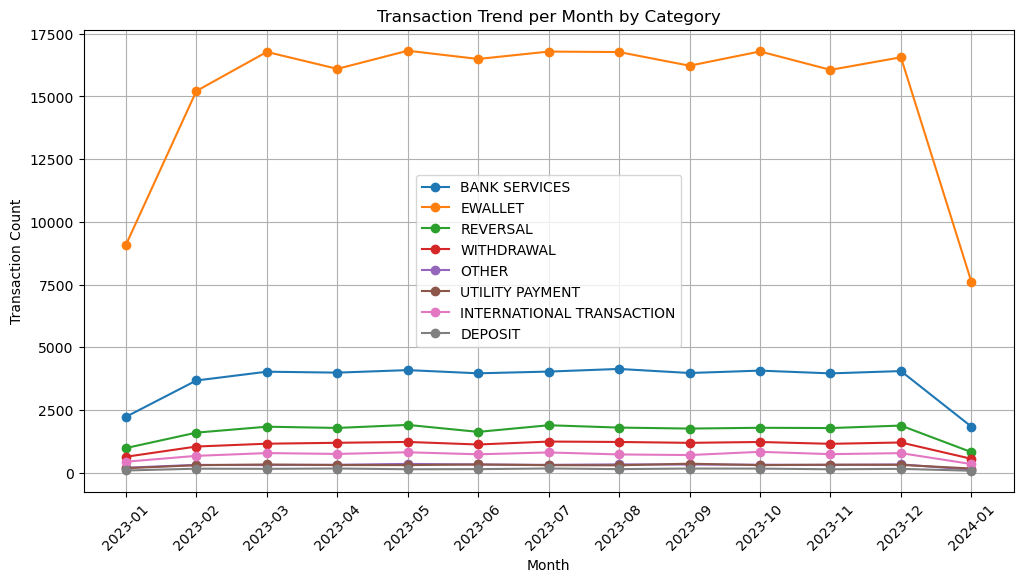

In [99]:

# Membuat DataFrame untuk visualisasi
month_visual = pd.DataFrame(transaction_count.stack()).reset_index()
month_visual.columns = ['month', 'category', 'transaction_count']

# konversi month ke str
month_visual['month'] = month_visual['month'].astype(str)

# Visualisasi data
plt.figure(figsize=(12, 6))
for category in month_acc['category'].unique():
    month_cat = month_visual[month_visual['category'] == category]
    plt.plot(month_cat['month'], month_cat['transaction_count'], marker='o', label=category)
    

plt.title('Transaction Trend per Month by Category')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Akumulasi Tahunan

In [101]:
# Resample data ke frekuensi tahunan dan hitung total akumulasi per kategori
annual_accumulation = akumulasi_data.resample('Y').sum()

pivot_table_year = pd.pivot_table(akumulasi_data, values='amount', index=dc_acc.index.year, columns='category', aggfunc='count')


# Tampilkan hasil
pivot_table_year

C:\Users\Delll\AppData\Local\Temp\ipykernel_11836\3728156972.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_accumulation = akumulasi_data.resample('Y').sum()


category,BANK SERVICES,DEPOSIT,EWALLET,INTERNATIONAL TRANSACTION,OTHER,REVERSAL,UTILITY PAYMENT,WITHDRAWAL
trx_date,,,,,,,,
2023,46238,1838,189673,8838,3800,20683,3690,13671
2024,1841,84,7612,350,126,825,172,559


In [106]:
import seaborn as sns

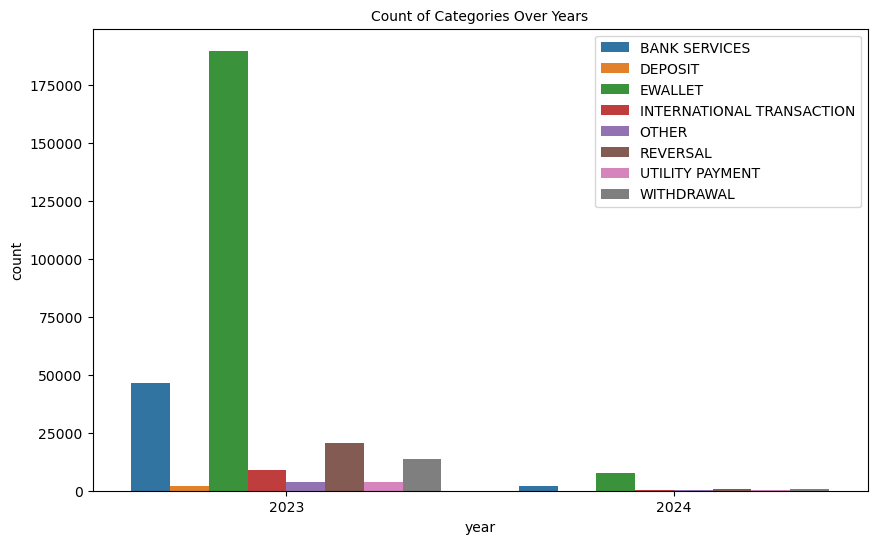

In [108]:

akumulasi_year_sorted = akumulasi_data.sort_values(by='category')

plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='category', data=akumulasi_year_sorted)
plt.title("Count of Categories Over Years", fontsize=10)
plt.legend()

plt.show()

## Reversal

In [111]:
reversal_acc = akumulasi_data[akumulasi_data['category'] == 'REVERSAL']

In [112]:
reversal_acc.head(5)

,account_number,trx_type,amount,flag_db_cr,information,reference_number,currency,trx_time,cif,fitur,category,month,year,week
trx_date,,,,,,,,,,,,,,
2023-07-01,18281,Cryptocurrencies,17949163.0,D,REVERSAL RV,837123,IDR,21:51:19,5679424956,OVO,REVERSAL,7,2023,26
2023-04-21,836187,QR Code Payment,5485018.0,C,REVERSAL RV,892227,IDR,22:54:30,299329192,Shopee Pay,REVERSAL,4,2023,16
2023-09-13,606245,Mobile Banking,7171719.0,C,REVERSAL RV,8296,IDR,17:26:53,1085670331,Shopee Pay,REVERSAL,9,2023,37
2023-05-09,311271,Mobile Banking,4901155.0,D,REVERSAL RV,169975,IDR,01:46:16,4852079835,OVO,REVERSAL,5,2023,19
2023-09-10,706738,Electronic Transfers,19900818.0,D,REVERSAL RV,909927,IDR,11:02:48,2382107887,Bank Services,REVERSAL,9,2023,36


Text(0, 0.5, 'Reversal')

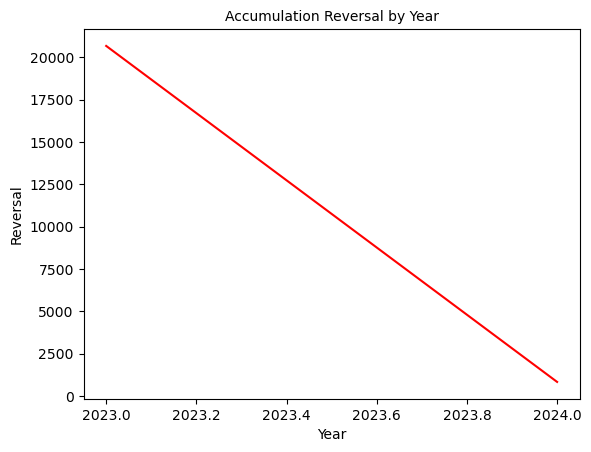

In [113]:
reversal_acc['year'].value_counts().sort_index().plot(kind='line', color='red')
plt.title("Accumulation Reversal by Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Reversal", fontsize = 10)


<Figure size 700x600 with 0 Axes>

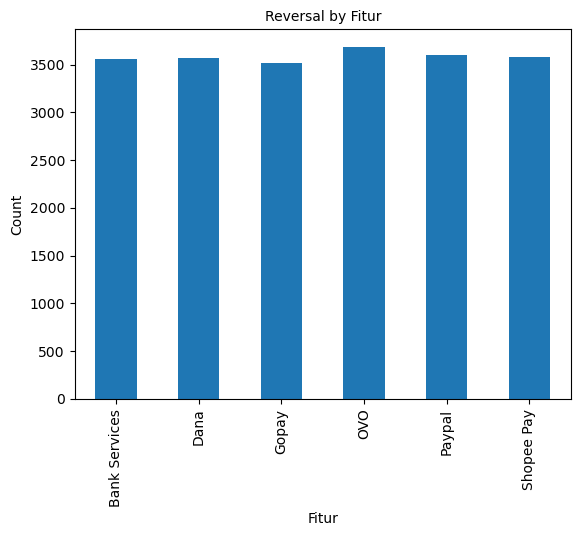

<Figure size 700x600 with 0 Axes>

In [114]:

reversal_acc['fitur'].value_counts().sort_index().plot(kind='bar')
plt.title("Reversal by Fitur", fontsize = 10)
plt.xlabel("Fitur", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.figure(figsize=(7,6))

In [115]:
reversal_acc['fitur'].value_counts()

OVO              3687
Paypal           3599
Shopee Pay       3580
Dana             3566
Bank Services    3557
Gopay            3519
Name: fitur, dtype: int64